In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
#Loading the dataset 
data = pd.read_csv("vehicle-1.csv")

In [3]:
#Checking the head of the data 
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
print("The shape of dataset is {}".format(data.shape))

The shape of dataset is (846, 19)


In [5]:
#Overall information of dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
#Comments 
# The dataset has 846 rows but above result shows most of attribute has entries less than 846.
# This indicates the presence of missing value.
# Target column is in the form of object(van,car,bus) and as the ML algorithm can only understand numeric 
# So need to perform label encoding on it.

In [7]:
#Checking the distribution of dataset along the class
data['class'].value_counts()
#Most of the data in the dataset is of Car and least data belongs to van

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
#Label encoding the class column as ML algorithm can only understand numeric 
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [9]:
#After encoding it converts class into these numeric which is 1,0,2
# 1 indicates Car
# 2 indicates bus
# 3 indicates van


In [10]:
#creating the copy of original data set 
df = data
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [11]:
#Pairplot
#sns.pairplot(df,diag_kind = 'kde',hue = 'class')

In [12]:
#Confirmation of missing value 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [13]:
#Above table confirms that there are missing values , as the count for all the attributes are not 846
#Missing values are present in all the attributes except compactness,max.length_aspect_ratio,max.length_rectangularity,
#hollows_ratio and class.

In [14]:
#Missing value analysis
missing_values_column = df.columns[df.isnull().any()]
#Number of missing values
df[missing_values_column].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [15]:
#Above table shows the number of missing values per attribute 

In [16]:
#Listing all the rows which has missing values 
df[df.isnull().any(axis=1)][missing_values_column].head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0
35,46.0,NaN,172.0,67.0,157.0,43.0,20.0,170.0,363.0,184.0,67.0,17.0,7.0,192.0
66,43.0,68.0,125.0,57.0,149.0,46.0,19.0,169.0,323.0,172.0,NaN,NaN,18.0,179.0


In [17]:
df[df.isnull().any(axis=1)][missing_values_column].shape
#There are total 33 rows which has missing values

(33, 14)

In [18]:
#Missing value Handling  
df[df['circularity'].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
5,NaN,106.0,172.0,50.0,255.0,26.0,28.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0
105,NaN,103.0,202.0,64.0,220.0,30.0,25.0,NaN,711.0,214.0,73.0,11.0,NaN,188.0
118,NaN,NaN,128.0,56.0,150.0,46.0,19.0,168.0,324.0,173.0,82.0,9.0,14.0,180.0
266,NaN,65.0,116.0,53.0,152.0,45.0,19.0,175.0,335.0,NaN,85.0,5.0,4.0,179.0
396,NaN,106.0,177.0,51.0,256.0,26.0,28.0,285.0,966.0,261.0,87.0,11.0,2.0,182.0


In [19]:
#Above table shows that there are 5 missing values in the circularity column 
#but there are more than 1 missing value present per row
# for example for 105 apart from missing values in the circularity there are missing values in the scaled_variance.1
#and skewness_about.1
#Similarly in 118 and 266 also missing values are present apart from circularity attribues 
#So will impute the median values in 5 and 396 based on the class 
#Drop 105,118,266 as more than 1 missing values are there 

In [20]:
#Rows 105,118,266 has missing values in more than 1 attribute so dropping those rows from dataset
df.drop([105,118,266],inplace=True)

In [21]:
#checking the class of the 5 and 396 to impute the median values based on class
print("The row number {} belongs to {} class".format(5 , df.loc[5]['class']))
print("The row number {} belongs to {} class".format(396 , df.loc[396]['class']))

The row number 5 belongs to 0.0 class
The row number 396 belongs to 0.0 class


In [22]:
#As both of the rows belongs to 0 class, will impute there the median values of class 0
median_circularity = df['circularity'][df['class']==0].median()
df['circularity'].fillna(median_circularity,inplace=True)

In [23]:
#cross checking the missing values 
df[df['circularity'].isnull()][missing_values_column]
#empty entries means no missing values present in the circularity columns

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [24]:
#Missing value handling in distance circularity
df[df['distance_circularity'].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
35,46.0,NaN,172.0,67.0,157.0,43.0,20.0,170.0,363.0,184.0,67.0,17.0,7.0,192.0
207,42.0,NaN,121.0,55.0,149.0,46.0,19.0,167.0,323.0,NaN,85.0,1.0,6.0,179.0
319,51.0,NaN,194.0,60.0,220.0,30.0,25.0,247.0,731.0,209.0,80.0,7.0,7.0,188.0


In [25]:
#As from the above table we can say that there are 3 missing values in one or more than attribute
#In 207 there are two missing values one in distance circularity and other one in scaled_radius_of_gyration
#So will drop this scaled radius of gyration and impute the median values for two rows(35,319) based on the class 

In [26]:
#dropping this 207 entries
df.drop([207],inplace= True)

In [27]:
#finding the class for the remaining two
print("The row number {} belongs to {} class".format(35,df.loc[35]['class']))
print("The row number {} belongs to {} class".format(319,df.loc[319]['class']))

The row number 35 belongs to 2.0 class
The row number 319 belongs to 0.0 class


In [28]:
#Calculating the median values for both the classes
distance_circularity_median_van = df["distance_circularity"][df['class']==2].median()
distance_circularity_median_bus = df["distance_circularity"][df['class']==0].median()

In [29]:
print("The median values of distance circularity for van is {}".format(distance_circularity_median_van))
print("The median values of distance circularity for car is {}".format(distance_circularity_median_bus))

The median values of distance circularity for van is 75.0
The median values of distance circularity for car is 72.5


In [30]:
#Replacing the nan with the median values of distance circularity class wise
df.loc[35]=df.loc[35].replace(np.nan,distance_circularity_median_van)
df.loc[319]=df.loc[319].replace(np.nan,distance_circularity_median_bus)

In [31]:
#Cross checking the presence of the missing values in 
df[df["distance_circularity"].isnull()]
#This below table indicate that no missing values are present 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [32]:
#Missing values handling for radius ratio
df[df['radius_ratio'].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
9,44.0,98.0,NaN,62.0,183.0,36.0,22.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0
78,52.0,94.0,NaN,66.0,208.0,31.0,24.0,227.0,666.0,218.0,76.0,11.0,4.0,193.0
159,45.0,75.0,NaN,57.0,150.0,44.0,19.0,170.0,335.0,180.0,66.0,16.0,2.0,193.0
287,43.0,84.0,NaN,55.0,154.0,44.0,19.0,174.0,350.0,164.0,73.0,6.0,2.0,185.0
345,54.0,106.0,NaN,57.0,236.0,28.0,26.0,256.0,833.0,253.0,81.0,6.0,14.0,185.0
467,54.0,104.0,NaN,58.0,215.0,31.0,24.0,221.0,682.0,222.0,75.0,13.0,23.0,186.0


In [33]:
#As from the above table we found 6 missing values 
#good thing is that missing values are present only in the radius ratio ,so need not to drop any row 

In [34]:
#Finding the class of the missing values
df[df['radius_ratio'].isnull()]['class']

9      1
78     0
159    1
287    2
345    0
467    1
Name: class, dtype: int32

In [35]:
#from abpve result ca,e to know that 
#9,159,467 belongs to class 1 - car
#78,345 belongs to class 0 - bus
#287 belong to class 2 - van

In [36]:
#finding the median values of radius ratio class wise
median_radius_ratio_for_van = df['radius_ratio'][df['class']==2].median()
median_radius_ratio_for_bus = df['radius_ratio'][df['class']==0].median()
median_radius_ratio_for_car = df['radius_ratio'][df['class']==1].median()

print("The median values of radius ratio for van is {}".format(median_radius_ratio_for_van))
print("The median values of radius ratio for bus is {}".format(median_radius_ratio_for_bus))
print("The median values of radius ratio for car is {}".format(median_radius_ratio_for_car))

The median values of radius ratio for van is 144.0
The median values of radius ratio for bus is 169.0
The median values of radius ratio for car is 186.0


In [37]:
#Replacing the median values class wise 
#For car
df.loc[[9,159,467]] =df.loc[[9,159,467]].replace(np.nan , median_radius_ratio_for_car)
#For van
df.loc[287] = df.loc[287].replace(np.nan,median_radius_ratio_for_van)
#For bus
df.loc[[78,345]] = df.loc[[78,345]].replace(np.nan ,median_radius_ratio_for_bus)

In [38]:
#Cross checking the presendce of missing values in the radisu ratio
df[df["radius_ratio"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [42]:
#Missing values handling for pr.axis_aspect_ratio
df[df["pr.axis_aspect_ratio"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
19,56.0,100.0,215.0,NaN,208.0,32.0,24.0,227.0,651.0,223.0,74.0,6.0,5.0,186.0


In [40]:
# 2 entries have missing values and as in 222 missing values are present in 2 attributes , so dropping this row
#Only handle missing values for 19

In [41]:
#Dropping 222 as more than 1 missing values are present in the attribute
df.drop([222],inplace = True)

In [43]:
#Finding the class of 19 
print("The row number {} belongs to {} class".format(19,df.loc[19]['class']))

#finding the median value of row 19 and replacing it with median value of class 1 - car
pr_axis_aspect_ratio_median_car  = df["pr.axis_aspect_ratio"][df['class']==1].median()
print("The median values of pr_axis_aspect_ratio for car is {}".format(pr_axis_aspect_ratio_median_car))

#Replacing nan with median value
df.loc[19] = df.loc[19].replace(np.nan , pr_axis_aspect_ratio_median_car)

#Cross checking the missing values for pr_axis_aspect_ratio
df[df["pr.axis_aspect_ratio"].isnull()][missing_values_column]

The row number 19 belongs to 1.0 class
The median values of pr_axis_aspect_ratio for car is 61.0


,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [44]:
#Handling the missing values for scatter ratio 
df[df["scatter_ratio"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
249,34.0,53.0,127.0,58.0,NaN,58.0,17.0,137.0,197.0,127.0,70.0,NaN,20.0,185.0


In [45]:
#from the above table only 1 entry has missing values but in 2 attributes
#So dropping this entry 249 
df.drop([249],inplace=True)

#Cross checking for the missing values in scatter_ratio
df[df["scatter_ratio"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [46]:
#Missing value handling in elongatedness
df[df["elongatedness"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
215,39.0,86.0,169.0,62.0,162.0,NaN,20.0,194.0,388.0,147.0,74.0,1.0,22.0,185.0


In [47]:
#In the elongatedness only 1 missing value is present at 215

#Finding the class of 215 and replacing that NAn with the median value of that particular class
print("The row number {} belongs to {} class".format(215,df.loc[215]['class']))

#Finding the mdian values of this particular class
median_value_elongatedness_car = df["elongatedness"][df['class']==1].median()
print("The median values of elongatedness for car is {}".format(median_value_elongatedness_car))

#replacing nan with this median value
df.loc[215] = df.loc[215].replace(np.nan,median_value_elongatedness_car)

#Cross checking the presence of missing values in the elongatedness 
df[df["elongatedness"].isnull()][missing_values_column]

The row number 215 belongs to 1.0 class
The median values of elongatedness for car is 36.0


,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [48]:
#Missing value handling in pr.axis_rectangularity
df[df["pr.axis_rectangularity"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
70,55.0,98.0,161.0,54.0,215.0,31.0,NaN,226.0,683.0,221.0,76.0,3.0,6.0,185.0
237,45.0,65.0,128.0,56.0,151.0,45.0,NaN,170.0,332.0,186.0,81.0,1.0,10.0,179.0
273,45.0,80.0,162.0,63.0,146.0,46.0,NaN,161.0,316.0,161.0,64.0,5.0,10.0,199.0


In [49]:
#From above table - there are entries where missing value present in only one attribute that is pr.axis_rectangularity
#So need to replace those nan with the median values

In [50]:
#Finding the class 70,237,273
df.loc[[70,237,273]]['class']

#From below result 
#70 belongs to class 1 - car
#237 belongs to class 0 - bus
#273 belongs to class 2 - van

70     1
237    0
273    2
Name: class, dtype: int32

In [51]:
#Finding the median value of pr.axis_rectangularity for class 1 - car
median_pr_axis_rectangularity_car  = df["pr.axis_rectangularity"][df['class']==1].median()
median_pr_axis_rectangularity_bus = df["pr.axis_rectangularity"][df['class']==0].median()
median_pr_axis_rectangularity_van = df["pr.axis_rectangularity"][df['class']==2].median()

print("The median values of pr.axis_rectangularity for van is {}".format(median_pr_axis_rectangularity_van))
print("The median values of pr.axis_rectangularity for bus is {}".format(median_pr_axis_rectangularity_bus))
print("The median values of pr.axis_rectangularity for car is {}".format(median_pr_axis_rectangularity_car))

#Replacing the nan with the corresponding median values
df.loc[237] = df.loc[237].replace(np.nan,median_pr_axis_rectangularity_bus)
df.loc[70] = df.loc[70].replace(np.nan,median_pr_axis_rectangularity_car)
df.loc[273] = df.loc[273].replace(np.nan,median_pr_axis_rectangularity_van)

The median values of pr.axis_rectangularity for van is 18.0
The median values of pr.axis_rectangularity for bus is 19.0
The median values of pr.axis_rectangularity for car is 22.0


In [52]:
#Cross checking the presence of missing value in pr.axis_rectangularity column
df[df["pr.axis_rectangularity"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [53]:
#Missing values handling for scaled variance
df[df["scaled_variance"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
372,47.0,87.0,164.0,64.0,156.0,43.0,20.0,NaN,359.0,182.0,68.0,1.0,13.0,192.0
522,36.0,69.0,162.0,63.0,140.0,48.0,18.0,NaN,291.0,126.0,66.0,1.0,38.0,193.0


In [54]:
#Above table shows that 2 missing values are present in scaled_variance at 372 and 522
df.loc[[372,522]]['class']
#From the result below 
#372 belongs to class 2 ->van
#522 belongs to class 1 -> car

372    2
522    1
Name: class, dtype: int32

In [55]:
#Finding the median values of scaled_variance for class 2 and 1
median_scaled_variance_van =  df["scaled_variance"][df['class']==2].median()
median_scaled_variance_car = df["scaled_variance"][df['class']==1].median()

print("The median values of scaled_variance for van is {}".format(median_scaled_variance_van))
print("The median values of scaled_variance for car is {}".format(median_scaled_variance_car))

#Replacing these nan with the median values 
df.loc[372] = df.loc[372].replace(np.nan,median_scaled_variance_van)
df.loc[522] = df.loc[522].replace(np.nan,median_scaled_variance_car)

The median values of scaled_variance for van is 164.0
The median values of scaled_variance for car is 206.5


In [56]:
#Cross checking the presence of missing values 
df[df["scaled_variance"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [57]:
#Missing values handling in scaled_variance.1
df[df["scaled_variance.1"].isnull()][missing_values_column]

#below table shows that there are 2 missing values only in sacled_variance.1 at 308 and 496

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
308,51.0,100.0,197.0,59.0,192.0,34.0,22.0,210.0,NaN,195.0,64.0,14.0,3.0,196.0
496,55.0,98.0,224.0,68.0,215.0,31.0,24.0,222.0,NaN,214.0,68.0,2.0,29.0,189.0


In [58]:
#Finding the class of 308 and 496
df.loc[[308,496]]['class']

308    1
496    1
Name: class, dtype: int32

In [59]:
#Both the entries 308 and 496 belongs to class 1
#finiding the median values for same class
median_scaled_variance_1_car = df['scaled_variance.1'][df['class']==1].median()
#Replacing nan with median value 
df.loc[[308,496]] = df.loc[[308,496]].replace(np.nan,median_scaled_variance_1_car)

In [60]:
#Cross checking for missing values
df[df["scaled_variance.1"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [61]:
#Missing value handling in scaled_radius_of_gyration
df[df["scaled_radius_of_gyration"].isnull()]
#Below table shows that no missing values in scaled_radius_of_gyration

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


In [62]:
#Missing value handling in scaled_radius_of_gyration.1
df[df["scaled_radius_of_gyration.1"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
66,43.0,68.0,125.0,57.0,149.0,46.0,19.0,169.0,323.0,172.0,NaN,NaN,18.0,179.0
77,40.0,62.0,140.0,62.0,150.0,45.0,19.0,165.0,330.0,173.0,NaN,2.0,3.0,180.0
192,43.0,76.0,149.0,57.0,149.0,44.0,19.0,172.0,335.0,176.0,NaN,14.0,0.0,189.0
329,38.0,80.0,169.0,59.0,161.0,41.0,20.0,186.0,389.0,137.0,NaN,5.0,15.0,192.0


In [63]:
#From the above table 4 entries have missing value either in one or more attributes
#entry 66 has two nan one in scaled radius of gyration 1 and other one in skewness_about
#Need to drop 66 and impute the median value for (77,192,329) classwise

In [64]:
df.drop([66],inplace = True)

In [65]:
#Finding the class of (77,192,329)
df.loc[[77,192,329]]['class']

77     1
192    1
329    1
Name: class, dtype: int32

In [66]:
#From above result came to know that all entries belong to class 1 which is car 
#Finding the median values of sacled_radius_of_gyration.1 for car
median_value_scaled_radius_of_gyration_1 = df["scaled_radius_of_gyration.1"][df["class"]==1].median()
df.loc[[77,192,329]] = df.loc[[77,192,329]].replace(np.nan,median_value_scaled_radius_of_gyration_1)

#cross checking the presence of null values
df[df["scaled_radius_of_gyration.1"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [67]:
#Missing value handling in skewness_about
df[df["skewness_about"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
141,42.0,63.0,125.0,55.0,149.0,46.0,19.0,166.0,320.0,172.0,86.0,NaN,7.0,179.0
177,44.0,72.0,160.0,66.0,144.0,46.0,19.0,166.0,312.0,169.0,69.0,NaN,1.0,191.0
285,48.0,85.0,189.0,64.0,169.0,39.0,20.0,188.0,427.0,190.0,64.0,NaN,5.0,195.0


In [68]:
#Above table confirms that missing value present in 141,177,285
#Checking the class of those row numbers
df.loc[[141,177,285]]['class']

141    0
177    0
285    1
Name: class, dtype: int32

In [69]:
#141,177 belongs to class 0 - bUs
#285 belongs to class 1 - car

#Finding the median value of skewness about for bus
median_value_skewness_about_bus = df["skewness_about"][df["class"]==0].median()
median_value_skewness_about_car = df["skewness_about"][df["class"]==1].median()

#Replacing the nan with median value 
df.loc[[141,177]] = df.loc[[141,177]].replace(np.nan,median_value_skewness_about_bus)
df.loc[285] = df.loc[285].replace(np.nan,median_value_skewness_about_car)

In [70]:
#Cross checking the presence of nan in skewness about
df[df["skewness_about"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [71]:
#Missing value handling in skewness_about.1
df[df["skewness_about.1"].isnull()][missing_values_column]
#No missing value in skewness_about.1

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [72]:
#Missing value handling in skewness_about.2
df[df["skewness_about.2"].isnull()][missing_values_column]
#From below result one missing value is present at 419 in skewness about 2

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
419,34.0,72.0,144.0,56.0,133.0,50.0,18.0,158.0,263.0,125.0,63.0,5.0,20.0,NaN


In [73]:
#finding the class of 419
print ("The class of {} is {}".format(419 , df.loc[419]['class']))

#Finding the median for class 1 
median_skweness_about_2_car = df["skewness_about.2"][df["class"]==1].median()
#Repacing the nan with median value 
df.loc[419] = df.loc[419].replace(np.nan,median_skweness_about_2_car)

The class of 419 is 1.0


In [74]:
#Cross checking for missing values in skewness about 2
df[df["skewness_about.2"].isnull()][missing_values_column]

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2


In [75]:
#Overall checking for missing value in whole dataset
df.isnull().any()
#Below result shows no missing value is present

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [76]:
#Checking the shape of data as few rows dropped due to presence of NAN in more than 1 attribute
print("The shape of dataset after handling missing value is {}".format(df.shape))

df.info()
#Now in info all the attribute has equal number of rows that is 839
#Only 7 record out of 846 is dropped

The shape of dataset after handling missing value is (839, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  839 non-null    int64  
 1   circularity                  839 non-null    float64
 2   distance_circularity         839 non-null    float64
 3   radius_ratio                 839 non-null    float64
 4   pr.axis_aspect_ratio         839 non-null    float64
 5   max.length_aspect_ratio      839 non-null    int64  
 6   scatter_ratio                839 non-null    float64
 7   elongatedness                839 non-null    float64
 8   pr.axis_rectangularity       839 non-null    float64
 9   max.length_rectangularity    839 non-null    int64  
 10  scaled_variance              839 non-null    float64
 11  scaled_variance.1            839 non-null    float64
 12  scaled_radius_o

In [77]:
#5 point summary after missing value treatment
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,839.0,93.709178,8.218746,73.0,87.5,93.0,100.0,119.0
circularity,839.0,44.839094,6.144567,33.0,40.0,44.0,49.0,59.0
distance_circularity,839.0,82.138856,15.744684,40.0,70.0,80.0,98.0,112.0
radius_ratio,839.0,169.117998,33.346151,104.0,141.0,168.0,195.0,333.0
pr.axis_aspect_ratio,839.0,61.710369,7.900381,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,839.0,8.578069,4.617162,2.0,7.0,8.0,10.0,55.0
scatter_ratio,839.0,168.910608,33.255794,112.0,146.0,157.0,198.0,265.0
elongatedness,839.0,40.905840,7.803796,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,839.0,20.584029,2.591483,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,839.0,148.013111,14.522752,118.0,137.0,146.0,159.5,188.0


In [78]:
#Spliting the dataset into train and test (70:30), using random state = 17 
Y = df['class']
X = df.drop('class',axis = 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 17,test_size = 0.30)


In [79]:
#Importing the Support Vector Classifier from svm 
from sklearn.svm import SVC
#Instantiating the model
svc_model = SVC(C= 0.001,kernel = 'rbf')
#Fitting on X_train and y_train 
svc_model.fit(X_train,y_train)

predictions_svm = svc_model.predict(X_test)

In [80]:
#Checking the score on train data
print("The score on train set is ",svc_model.score(X_train,y_train))
print("The score on test set is  ",svc_model.score(X_test,y_test))

The score on train set is  0.504258943781942
The score on test set is   0.5198412698412699


In [81]:
#Score on train and test set is  very poor

In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print("The confusion matrix is \n",confusion_matrix(y_test,predictions_svm))

The confusion matrix is 
 [[  0  65   0]
 [  0 131   0]
 [  0  56   0]]


In [83]:
print("Classification report of only SVM is \n",classification_report(y_test,predictions_svm))

Classification report of only SVM is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.52      1.00      0.68       131
           2       0.00      0.00      0.00        56

    accuracy                           0.52       252
   macro avg       0.17      0.33      0.23       252
weighted avg       0.27      0.52      0.36       252



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
#On using Only SVM the result is very poor
#Precision and recall is also very poor

# PCA 

In [85]:
#Standardizing the X_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

#Creating the covariance matrix (It is pairplot in mathematical form)
train_cov_matrix = np.cov(X_train_std.T)
print("The covariance matrix is \n",train_cov_matrix)

The covariance matrix is 
 [[ 1.00170648  0.70373171  0.79388521  0.69949272  0.09927992  0.18096432
   0.81829386 -0.79482523  0.81546385  0.69748561  0.76927104  0.82234016
   0.60437036 -0.23369144  0.26210286  0.14718146  0.29237515  0.34861153]
 [ 0.70373171  1.00170648  0.79370294  0.6344222   0.15822092  0.25892503
   0.85164331 -0.82687972  0.84458783  0.96345212  0.79254719  0.84157068
   0.9222711   0.04565093  0.15015879 -0.00966429 -0.09018319  0.04758579]
 [ 0.79388521  0.79370294  1.00170648  0.77521938  0.15972618  0.28593532
   0.90280264 -0.90979783  0.88836889  0.77496436  0.85599527  0.88382542
   0.71074929 -0.22422365  0.12704185  0.26585415  0.15407874  0.32971101]
 [ 0.69949272  0.6344222   0.77521938  1.00170648  0.66122702  0.44461476
   0.74348101 -0.79991951  0.71031212  0.5775064   0.80401422  0.72988153
   0.55306634 -0.16611618  0.06755159  0.17594248  0.39015668  0.46412684]
 [ 0.09927992  0.15822092  0.15972618  0.66122702  1.00170648  0.60280289
   0.10

In [86]:
#Decomposing the covariance matrix to get eigen value and eigen vector
eigenvalues,eigenvectors = np.linalg.eig(train_cov_matrix)

print("The eigen vector is \n\n",eigenvectors)
print("\nThe eigen value is \n",eigenvalues)

The eigen vector is 

 [[ 2.77104464e-01  1.17101622e-01 -1.18433608e-01  1.05987679e-01
   8.32885971e-02 -1.03724032e-01 -3.87801812e-01 -5.92433835e-01
  -4.99681293e-01 -2.85193096e-01  2.32559492e-02  2.46686317e-02
  -1.66678991e-01 -1.10865141e-03 -4.90046423e-03  4.33888368e-02
   5.26561814e-02 -2.34176958e-02]
 [ 2.93312413e-01 -1.16733592e-01 -2.22050379e-02  1.70401899e-01
  -9.70533423e-02  2.96494291e-01  2.94286903e-01 -1.46623103e-01
  -4.35656343e-02  1.17099986e-01 -3.33414720e-02 -1.77964039e-01
  -2.36037881e-02  5.38267858e-03 -7.77023587e-02  3.90729408e-01
  -6.23393985e-01 -2.62818134e-01]
 [ 3.03027159e-01  7.64640351e-02 -6.12280919e-02 -7.28488099e-02
   4.95015027e-02  1.32661659e-01 -7.21134126e-02  4.40370878e-01
  -1.89037173e-01 -2.19546270e-01  7.10792428e-01  1.48576392e-03
   1.76516269e-01 -1.17745043e-02  2.68220722e-02 -2.33074515e-02
   3.25891643e-02 -2.26518316e-01]
 [ 2.69176813e-01  1.93156705e-01  2.63088960e-01 -4.75357976e-02
  -5.96053889e

In [87]:
# Making a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(9.448821919813906,
  array([ 0.27710446,  0.11710162, -0.11843361,  0.10598768,  0.0832886 ,
         -0.10372403, -0.38780181, -0.59243383, -0.49968129, -0.2851931 ,
          0.02325595,  0.02466863, -0.16667899, -0.00110865, -0.00490046,
          0.04338884,  0.05265618, -0.0234177 ])),
 (3.012958881551275,
  array([ 0.29331241, -0.11673359, -0.02220504,  0.1704019 , -0.09705334,
          0.29649429,  0.2942869 , -0.1466231 , -0.04356563,  0.11709999,
         -0.03334147, -0.17796404, -0.02360379,  0.00538268, -0.07770236,
          0.39072941, -0.62339399, -0.26281813])),
 (1.8514038717218482,
  array([ 0.30302716,  0.07646404, -0.06122809, -0.07284881,  0.0495015 ,
          0.13266166, -0.07211341,  0.44037088, -0.18903717, -0.21954627,
          0.71079243,  0.00148576,  0.17651627, -0.0117745 ,  0.02682207,
         -0.02330745,  0.03258916, -0.22651832])),
 (1.1712903030590927,
  array([ 0.26917681,  0.1931567 ,  0.26308896, -0.0475358 , -0.05960539,
         -0.2645968 ,

In [88]:
#Separating the eigenvales and eigenvectors from the sorted to use in graph
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)
#sorted so that we came to know which eigen vector is important and which is not 
#so the least importance one we can drop and perform dimensionality reduction 

Eigenvalues in descending order: 
[9.448821919813906, 3.012958881551275, 1.8514038717218482, 1.1712903030590927, 0.9141826114635598, 0.5595936935239711, 0.3815349705597648, 0.2238952669227997, 0.15412489171498706, 0.09567324236306896, 0.06616800626528188, 0.04589855110120415, 0.03433203854283625, 0.02576225948143668, 0.02221852341357159, 0.015893592953475984, 0.006553215100583054, 0.0004108839968358928]


In [89]:
#Converting the eigen value to the percentage of total covariance explained and create a cumulative sum 
#Summing up all eigenvalues to find the percentage 
total = sum(eigenvalues)
print("Total of eigen value is  ",total)
#Creating a list which contains the variance explained 
variance_explained = [(i/total) for i in train_eigvalues_sorted ] 
print("variance explained is \n",variance_explained)
#Calculating the cumulative sum 
cumulative_variance_sum = np.cumsum(variance_explained)
print("\ncumulative sum is \n",cumulative_variance_sum)

Total of eigen value is   18.030716723549496
variance explained is 
 [0.5240402844038374, 0.16710144847520786, 0.102680547873273, 0.06496082884654818, 0.05070140169578325, 0.031035576793966207, 0.021160277564643393, 0.012417435776714043, 0.008547907111961232, 0.005306125309933597, 0.0036697379965412802, 0.0025455755200932823, 0.0019040861807781595, 0.0014287984153058763, 0.0012322595798176174, 0.0008814731658846226, 0.00036344728837229493, 2.2788001338806842e-05]

cumulative sum is 
 [0.52404028 0.69114173 0.79382228 0.85878311 0.90948451 0.94052009
 0.96168037 0.9740978  0.98264571 0.98795183 0.99162157 0.99416715
 0.99607123 0.99750003 0.99873229 0.99961376 0.99997721 1.        ]


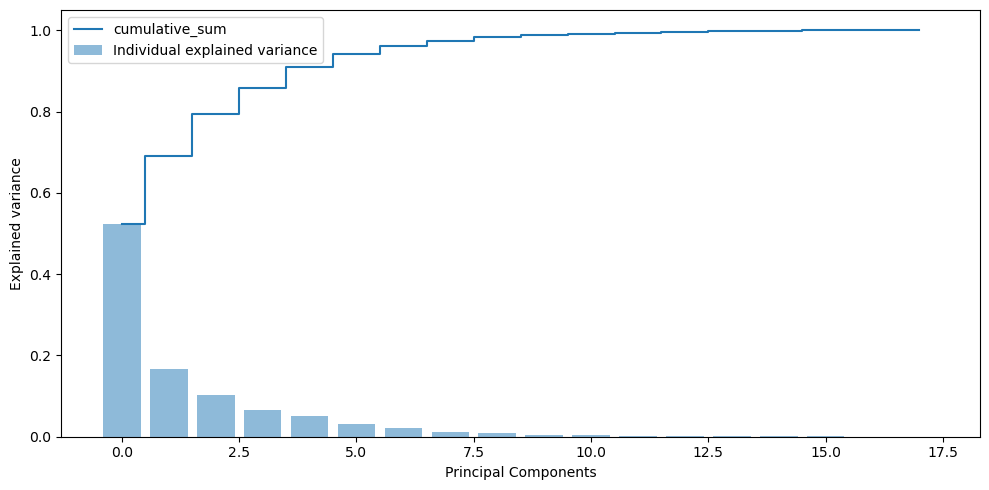

In [105]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(0,len(variance_explained)), variance_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_sum)),cumulative_variance_sum,where='mid',label = "cumulative_sum")
plt.ylabel("Explained variance")
plt.xlabel("Principal Components")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [106]:
#From the cumulative sum list shown above we can observe that
#First 8 principal components are able to capture 97% of the variance in data 
#So for model building will use first 8 principal components only

In [107]:
#Dropping those principal componets which are not adding much value 
p_reduce = np.array(train_eigvectors_sorted[0:8])

#Projecting original data into principal component dimension
X_std_8D = np.dot(X_train_std,p_reduce.T) 
Xtest_std_8D = np.dot(X_test_std,p_reduce.T)

#Converting array to dataframe
Proj_train_data_df = pd.DataFrame(X_std_8D)
Proj_test_data_df = pd.DataFrame(Xtest_std_8D)

In [108]:
#Checking the head of Proj_train_data
Proj_train_data_df.head()

,0,1,2,3,4,5,6,7
0,-0.027230,0.810196,-0.149805,-0.636842,1.415984,0.253212,-0.675332,-0.277405
1,-1.046296,1.053686,-0.107448,-0.227994,1.498440,-0.319119,-0.007723,1.373359
2,-0.121123,-0.743654,-0.146448,0.716302,-1.231675,0.073196,-0.454830,0.107508
3,0.240303,-0.660381,-0.141510,0.608354,-0.108865,0.904953,-0.318167,-0.198368
4,-0.357486,0.610403,-0.094232,0.684333,-2.157305,-0.444921,1.971385,-0.178775


In [109]:
#Using SVC on PCA data
from sklearn.svm import SVC
#Instatntiating the model
svc_pca_model = SVC(kernel = 'rbf')
#Fitting the model on PCA
svc_pca_model.fit(Proj_train_data_df,y_train)

SVC()

In [110]:
#checking the score
print("The score of model using pca on train data is {}".format(svc_pca_model.score(Proj_train_data_df,y_train)))
print("The score of model using pca on test data is {}".format(svc_pca_model.score(Proj_test_data_df,y_test)))

The score of model using pca on train data is 0.9131175468483816
The score of model using pca on test data is 0.8968253968253969


In [111]:
from sklearn.metrics import classification_report,confusion_matrix

prediction_svc_pca = svc_pca_model.predict(Proj_test_data_df)
print("The confusion Matrix is \n",confusion_matrix(y_test,prediction_svc_pca))

The confusion Matrix is 
 [[ 63   1   1]
 [  9 112  10]
 [  2   3  51]]


In [112]:
#classification report for SVC using PCA 
print("Classification report \n",classification_report(y_test,prediction_svc_pca))

Classification report 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        65
           1       0.97      0.85      0.91       131
           2       0.82      0.91      0.86        56

    accuracy                           0.90       252
   macro avg       0.88      0.91      0.89       252
weighted avg       0.90      0.90      0.90       252



In [113]:
# After applying the PCA and using those eigen vectors to fit the SVC
# Training and Testing results improved drastically 